In [22]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel(r'data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

### Data Description
The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.  

### Objective
To find some patterns and insights from the employability data through visualization of data.

## Univariate Analysis
### Boxplots

In [109]:
columns = ['Salary','DOJ','DOL','Designation','JobCity','Gender','10percentage','10board','12graduation','12percentage','12board','CollegeTier','Degree','Specialization','collegeGPA','CollegeCityID','CollegeCityTier','CollegeState','GraduationYear','English','Logical','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']
numeric_columns = ['Salary','10percentage','12percentage','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']
categorical_columns = ['DOJ','DOL','Designation','JobCity','Gender','10board','12board','CollegeTier','Degree','Specialization','CollegeCityID','CollegeCityTier','CollegeState','GraduationYear']
temp = pd.DataFrame(df[numeric_columns])
temp.head()

,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,84.3,95.8,78.00,515,585,525,0.635979,445,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,85.4,85.0,70.06,695,610,780,0.960603,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,85.0,68.2,70.00,615,545,370,0.450877,395,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,85.6,83.6,74.64,635,585,625,0.974396,615,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,78.0,76.8,73.90,545,625,465,0.124502,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=False)
temp = pd.DataFrame(sc.fit_transform(temp),columns=numeric_columns)
temp.head()

,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,0.527947,0.647233,1.939676,0.797646,0.127240,0.961148,0.095037,0.267789,0.447559,0.983466,0.707581,0.550939,1.512658,-0.304966
1,0.904045,0.758921,0.957729,-0.174641,1.842720,1.249258,2.180295,0.960524,-1.724556,-0.676367,0.246801,1.300083,0.060978,0.993910
2,0.081332,0.718307,-0.569744,-0.181988,1.080285,0.500173,-1.172473,-0.127212,0.204048,0.301041,1.661318,0.169167,-0.693995,0.803821
3,3.724775,0.779227,0.830439,0.386200,1.270894,0.961148,0.912785,0.989957,1.275495,0.081894,0.210589,-0.364495,-0.237001,-0.775129
4,-0.506320,0.007570,0.212176,0.295584,0.413154,1.422124,-0.395612,-0.823681,-1.724556,-0.819775,-0.452174,-1.127304,0.258734,0.008542


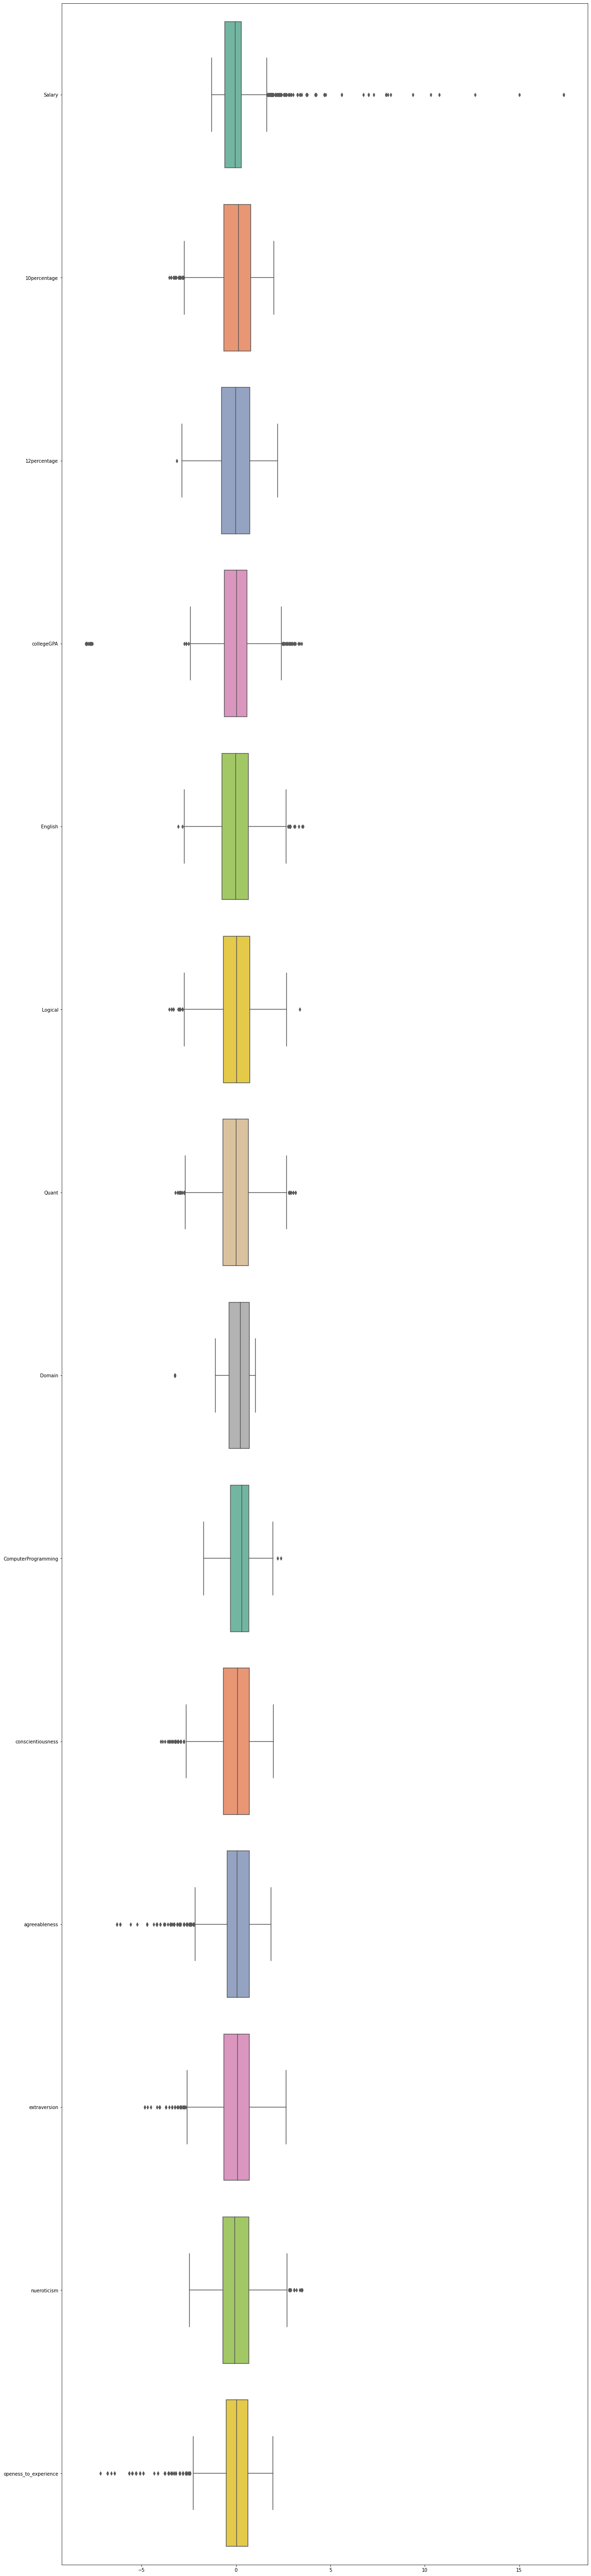

In [39]:
fig = plt.figure(figsize=(20,100))
ax = sns.boxplot(data=temp, orient="h", palette="Set2")

### Frequency Distributions of Numeric and Categorical variables

In [108]:
for col in columns:
    temp = pd.DataFrame(df[col].value_counts())
    temp.reset_index(drop=False,inplace=True)
    temp.rename(columns={'index':col,col:'Count'},inplace=True)
    print(temp)
    print('\n')
    print('-------------------------------------------------------------------------------------------')
    print('\n')

      Salary  Count
0     300000    293
1     180000    239
2     200000    205
3     325000    188
4     120000    165
..       ...    ...
172   755000      1
173   845000      1
174  1320000      1
175  1025000      1
176   725000      1

[177 rows x 2 columns]


-------------------------------------------------------------------------------------------


          DOJ  Count
0  2014-07-01    199
1  2014-06-01    180
2  2014-08-01    178
3  2014-09-01    142
4  2014-01-01    142
..        ...    ...
76 2004-08-01      1
77 2015-11-01      1
78 2006-01-01      1
79 2007-09-01      1
80 2015-12-01      1

[81 rows x 2 columns]


-------------------------------------------------------------------------------------------


                    DOL  Count
0               present   1875
1   2015-04-01 00:00:00    573
2   2015-03-01 00:00:00    124
3   2015-05-01 00:00:00    112
4   2015-01-01 00:00:00     99
..                  ...    ...
62  2010-10-01 00:00:00      1
63  2015-10-01 00:00:

### Probablity distribution(Normal Distribution) for numeric variables

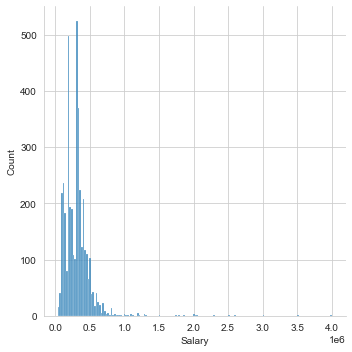

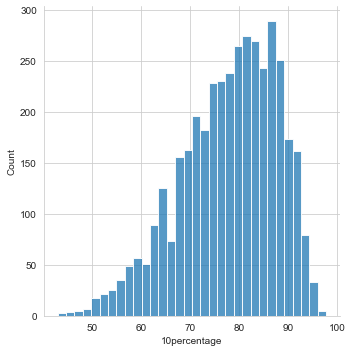

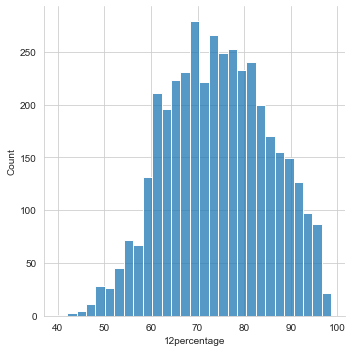

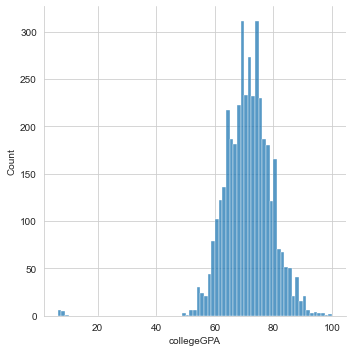

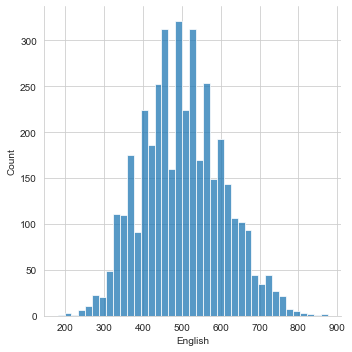

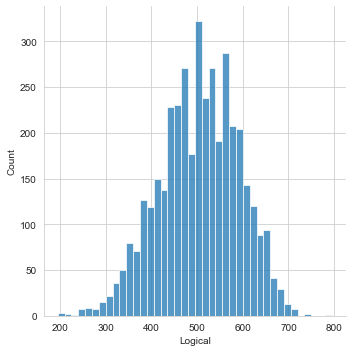

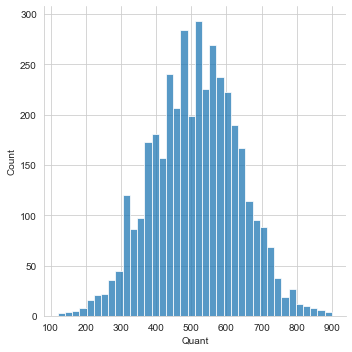

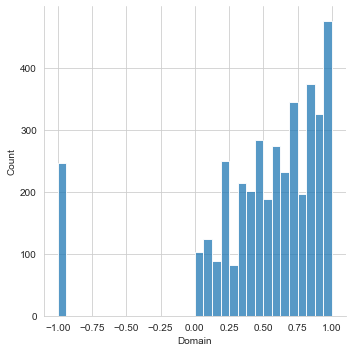

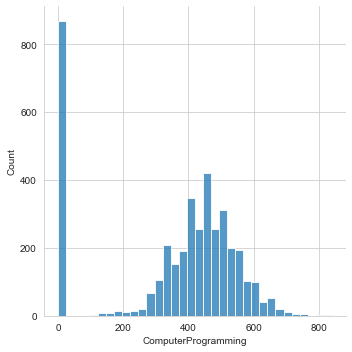

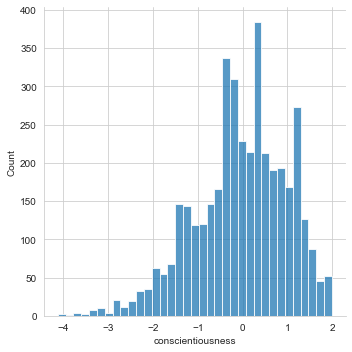

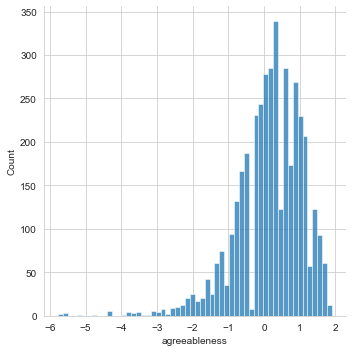

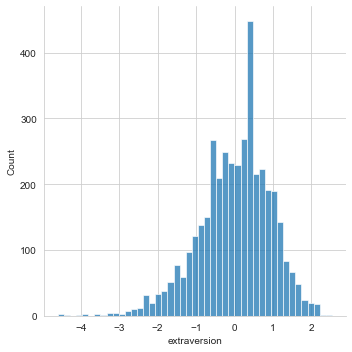

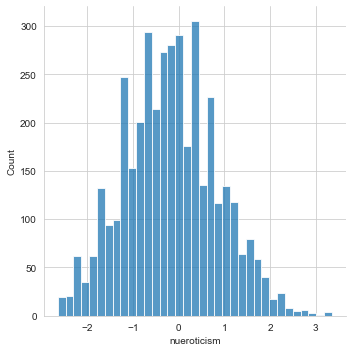

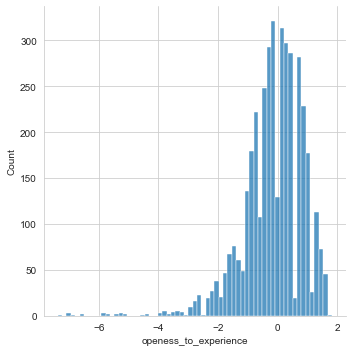

In [124]:
for col in numeric_columns:
    sns.displot(df[col])
    plt.plot()